In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()


def get_gemini_model():
    model = ChatGoogleGenerativeAI(
        google_api_key=os.getenv("GOOGLE_API_KEY"),
        model="gemini-2.5-flash-lite",
        temperature=0,
    )
    return model

In [3]:
class LLMState(TypedDict):
    question: str
    answer: str

In [4]:
def qa(state: LLMState) -> LLMState:
    llm = get_gemini_model()
    response = llm.invoke(state['question'])
    state['answer'] = response.content
    return state

In [5]:
graph = StateGraph(LLMState)
graph.add_node("QA", qa)

graph.add_edge(START, "QA")
graph.add_edge("QA", END)

workflow = graph.compile()

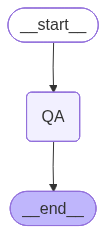

In [6]:
# Visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [7]:
workflow.invoke({"question": "What is the capital of France?"})

{'question': 'What is the capital of France?',
 'answer': 'The capital of France is **Paris**.'}